In [166]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [3]:
data = pd.read_csv('data/cleaned_data.csv', 
                   parse_dates=['Fully Paid','Approved']).drop(['Unnamed: 0'],axis=1)

In [4]:
data.head(2)

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,Proposed No. Of Stories,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,2,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaN,158.0,-0.035313
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,14,...,Other,NaN,NaN,MX-8,GW,N,198951,NaN,352.0,0.711858


In [5]:
sorted_data = data.sort_values(by='Fully Paid')

In [7]:
approved_annual = data.groupby(data['Fully Paid'].dt.year).count()

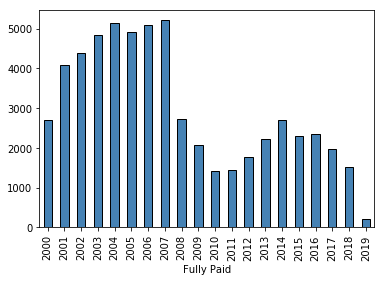

In [8]:
approved_annual.Approved.plot(kind='bar', color='steelblue', edgecolor='k');

##### Past vs present data

* We need to find out if the past data is still relevant for today to make the predictions. 
* create a subset of the first five years and the last five years and conduct a statistical analysis to check if these data is similar. 
    * H0: the first five year's of data has the same mean as the last five years
    * H1: the first five year's of data has a different mean form the last five years.
* Test the null hypothesis by conducting a t-test:
    * We need to check if the data is normally distributed before we can run the t-test. 
    * if the data is not normal, then we can run a Mann Whitney U test to check if the distributions are similar. 

In [6]:
first_five = sorted_data[sorted_data['Fully Paid'] < '2006-01-01']

In [22]:
last_five = sorted_data[sorted_data['Fully Paid'] >= '2015-05-15']

In [66]:
first_last = [first_five['Duration'],last_five['Duration']]

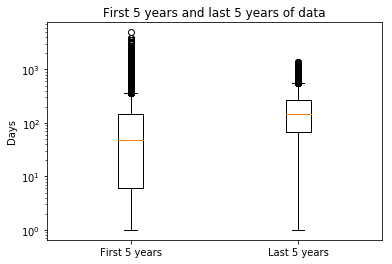

In [162]:
# Check if the first_five and last_five distributions are normal
fig,ax = plt.subplots()
ax.boxplot(first_last);
ax.set_ylabel('Days')
ax.set_yscale('log')
ax.set_xticklabels(['First 5 years','Last 5 years']);
ax.set_title('First 5 years and last 5 years of data');

,First_five,Last_five
count,26090.0,7573.0
mean,138.0,198.0
std,263.0,184.0
50%,48.0,147.0
max,4959.0,1392.0


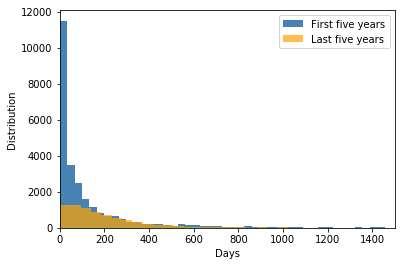

In [160]:
# histogram of the 2 distributions
plt.hist(first_five['Duration'],bins=150, label='First five years',color='steelblue');
plt.hist(last_five['Duration'],bins=30, label='Last five years',color='orange', alpha=0.7);
plt.ylabel('Distribution')
plt.xlabel('Days')
plt.xlim(0,1500)
plt.legend();

pd.concat([first_five.Duration.describe(),last_five.Duration.describe()],
          axis=1, keys=['First_five','Last_five']).loc[['count',
                                                        'mean','std','50%','max']].round()

#### Discussion
* The above histogram shows that the first five year and the last five year have distinctly different distributions. The mean, std, median and extreme values are all different. 
* From the boxplot distributions and the histograms we can conclude that the data is NOT normally distributed. Therefore, we will try Mann–Whitney U test to check if the distributions are comparable (equal). 

In [172]:
# conduct the Mann-Whitney U test
x = first_five['Duration']
y = last_five['Duration'] 

mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=57250003.0, pvalue=0.0)

#### Discussion
* The p-value is 0, meaning that we can reject the null hypothesis that the 2 groups are similarly distributed. In other words, with very high level of confidence we can state that the 2 groups are NOT similar. 